# Download SST Script

Optimum Interpolation Sea Surface Temperature (OISST)

The NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST) is a long term Climate Data Record that incorporates observations from different platforms (satellites, ships, buoys and Argo floats) into a regular global grid. The dataset is interpolated to fill gaps on the grid and create a spatially complete map of sea surface temperature. Satellite and ship 
observations are referenced to buoys to compensate for platform differences and sensor biases.
https://www.ncei.noaa.gov/products/optimum-interpolation-sst

The OISST product is reliable for estimating large-scale and mesoscale horizontal temperature gradients, such as those associated with:

*    Major ocean currents (e.g., the Gulf Stream, Kuroshio).
*   Fronts and eddies.
*    Seasonal variations in temperature distribution.

Caution should be used for submesoscale features (<10 km), as the resolution and interpolation may not capture these processes accurately.

Compute salinity with :  https://climate.esa.int/en/projects/sea-surface-salinity/

SST path from Paridhi, 5 km temp data : /tigress/GEOCLIM/LRGROUP/prustogi/project_CarbNN/downloading_data

## Range of Argo Database 

From the "/data/GLOBARGO/src/data/df_argo_loc.csv" dataset, the Argo database studied here ranges from 2010-05-30 to 2024-05-02
Note that the "/data/GLOBARGO/src/data/df_eddy_subduction_anom.csv" contains the dataset of subduction events. Therefore SST data should be downloaded for this range of dates.
Note: NetCDF data can’t be accessed via ftp, use wget or curl

## Wget script 

The data is organized in monthly folders : https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202303/ 
Then for each day there is a file, for instance, January 1 2023: https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202303/oisst-avhrr-v02r01.20230301.nc

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [1]:
import os
from datetime import datetime, timedelta

# Base URL for NOAA OISST dataset
base_url = "https://www.ncei.noaa.gov/thredds/fileServer/OisstBase/NetCDF/V2.1/AVHRR/"

# Define the date range based on the Argo dataset
start_date = datetime.strptime("2010-03-30", "%Y-%m-%d")  # Start the download 3 months in advance
end_date = datetime.strptime("2024-05-02", "%Y-%m-%d")

# Define base output directory for downloaded SST files
output_dir = "./OISST_data/"
os.makedirs(output_dir, exist_ok=True)

# Loop over the date range and download daily SST files
current_date = start_date
while current_date <= end_date:
    # Format the date into the appropriate folder and file name
    year = current_date.strftime("%Y")  # Extract the year (e.g., "2010")
    year_month = current_date.strftime("%Y%m")  # e.g., "202303"
    day = current_date.strftime("%Y%m%d")       # e.g., "20230301"
    
    # Create subfolder for the year
    year_folder = os.path.join(output_dir, year)
    os.makedirs(year_folder, exist_ok=True)
    
    # Construct the full URL for the specific day's data
    file_url = f"{base_url}{year_month}/oisst-avhrr-v02r01.{day}.nc"
    output_file = os.path.join(year_folder, f"oisst-avhrr-v02r01.{day}.nc")
    
    # Check if the file already exists
    if not os.path.exists(output_file):
        try:
            # Use wget to download the file silently
            os.system(f"wget -q -O {output_file} {file_url}")
        except Exception as e:
            # Print only errors
            print(f"Error for {file_url}: {e}")
    
    # Increment the date
    current_date += timedelta(days=1)

print("Download complete.")


Download complete.


## Initial visualisation

In [3]:
sst_data

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 2010-03-30T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 nan nan nan ... -1.78 -1.78 -1.78
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    Description:                Reynolds, et al.(2007) Daily High-resolution ...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20100330.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    ...                         ...
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...

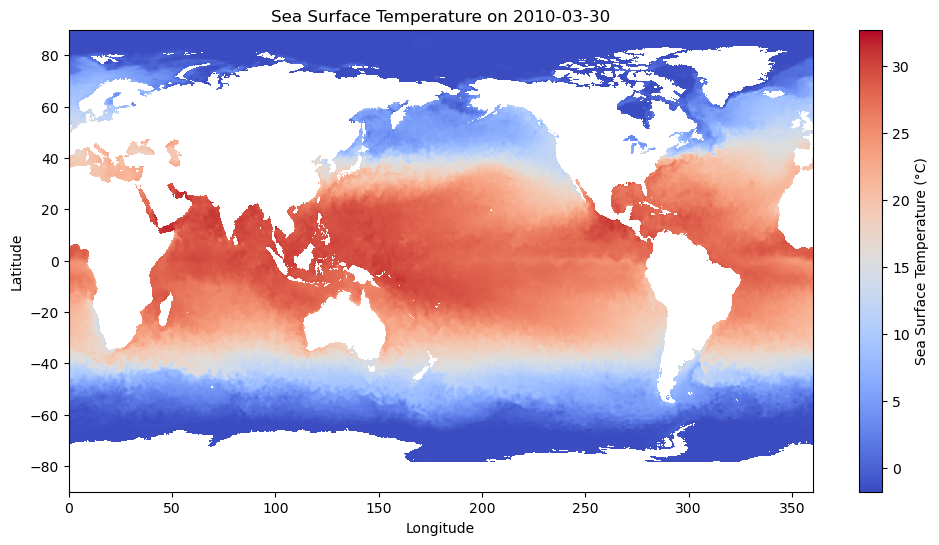

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the NetCDF file
file_path = "./OISST_data/2011/oisst-avhrr-v02r01.20110603.nc"

# Load the NetCDF file
try:
    # Load the dataset
    sst_data = xr.open_dataset(file_path)
    
    # Extract the SST variable, selecting the first time and depth slice
    sst = sst_data["sst"].isel(time=0, zlev=0).squeeze()  # Reduce dimensions to 2D
    lon = sst_data["lon"]
    lat = sst_data["lat"]
    
    # Mask invalid (NaN) values in SST
    sst = np.ma.masked_invalid(sst)

    # Plot the SST data
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(lon, lat, sst, shading="auto", cmap="coolwarm")
    plt.colorbar(label="Sea Surface Temperature (°C)")
    plt.title("Sea Surface Temperature on 2010-03-30")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

except FileNotFoundError:
    print(f"The file {file_path} does not exist. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


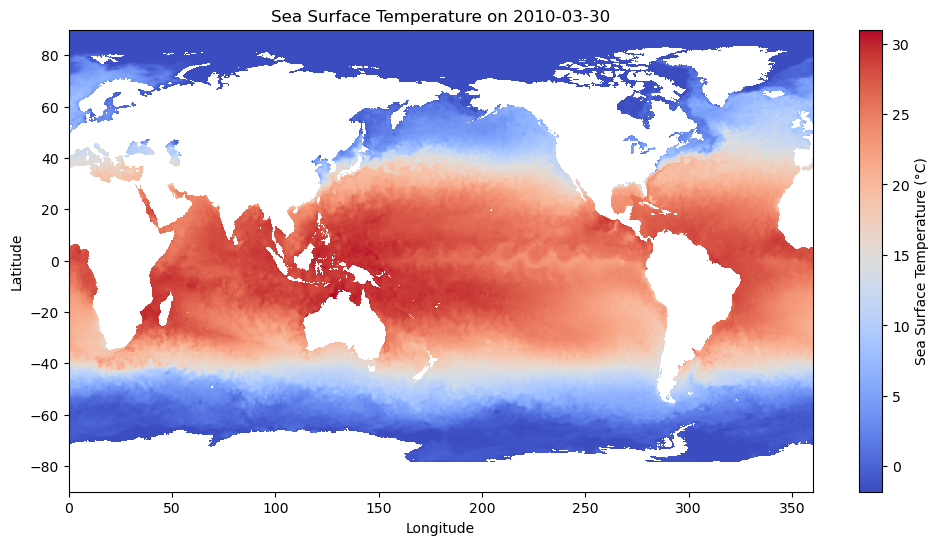

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the NetCDF file
file_path = "./OISST_data/2011/oisst-avhrr-v02r01.20110101.nc"

# Load the NetCDF file
try:
    # Load the dataset
    sst_data = xr.open_dataset(file_path)
    
    # Extract the SST variable, selecting the first time and depth slice
    sst = sst_data["sst"].isel(time=0, zlev=0).squeeze()  # Reduce dimensions to 2D
    lon = sst_data["lon"]
    lat = sst_data["lat"]
    
    # Mask invalid (NaN) values in SST
    sst = np.ma.masked_invalid(sst)

    # Plot the SST data
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(lon, lat, sst, shading="auto", cmap="coolwarm")
    plt.colorbar(label="Sea Surface Temperature (°C)")
    plt.title("Sea Surface Temperature on 2010-03-30")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

except FileNotFoundError:
    print(f"The file {file_path} does not exist. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


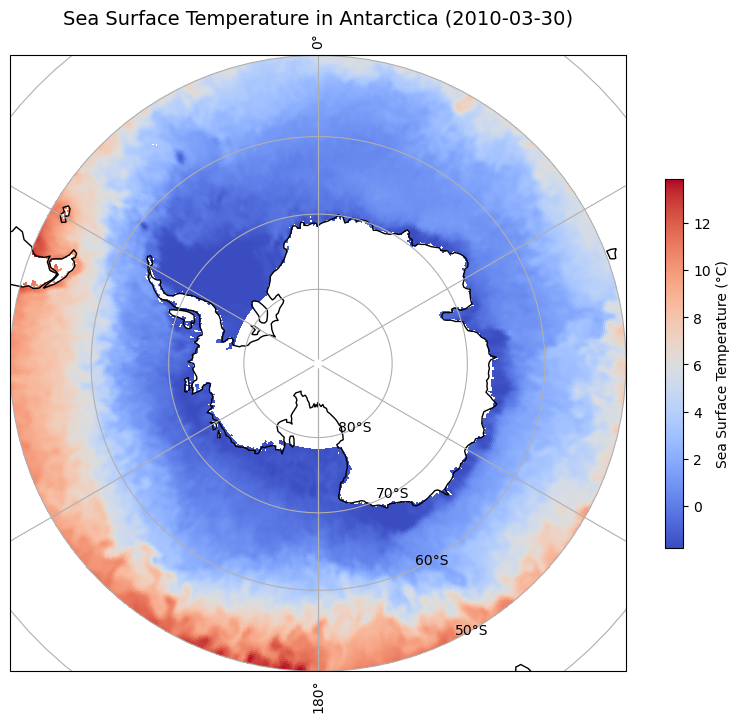

In [14]:
# Define the path to the NetCDF file
file_path = "./OISST_data/2024/oisst-avhrr-v02r01.20240228.nc"

# Load the NetCDF file
try:
    # Load the dataset
    sst_data = xr.open_dataset(file_path)
    
    # Extract the SST variable, selecting the first time and depth slice
    sst = sst_data["sst"].isel(time=0, zlev=0).squeeze()  # Reduce dimensions to 2D
    lon = sst_data["lon"]
    lat = sst_data["lat"]
    
    # Subset the data for Antarctica (latitudes below -50°)
    sst_antarctica = sst.where(lat < -50, drop=True)
    lat_antarctica = lat.where(lat < -50, drop=True)
    lon_antarctica = lon  # Longitude remains the same

    # Mask invalid (NaN) values in SST
    sst_antarctica = np.ma.masked_invalid(sst_antarctica)

    # Create a polar projection plot
    fig, ax = plt.subplots(
        subplot_kw={"projection": ccrs.SouthPolarStereo()},
        figsize=(10, 8)
    )
    
    # Plot the SST data in the polar projection
    mesh = ax.pcolormesh(
        lon_antarctica, lat_antarctica, sst_antarctica,
        transform=ccrs.PlateCarree(),
        shading="auto",
        cmap="coolwarm"
    )
    
    # Add features to the map
    ax.add_feature(cfeature.LAND, color="white")
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Add a colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation="vertical", shrink=0.6)
    cbar.set_label("Sea Surface Temperature (°C)")

    # Set the title
    ax.set_title("Sea Surface Temperature in Antarctica (2010-03-30)", fontsize=14)

    # Show the plot
    plt.show()

except FileNotFoundError:
    print(f"The file {file_path} does not exist. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


In [4]:
sst_data = xr.open_dataset('OISST_data/2010/oisst-avhrr-v02r01.20100330.nc')
    
print(sst_data)

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 2010-03-30T12:00:00
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    Description:                Reynolds, et al.(2007) Daily High-resolution ...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20100330.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    ...      

# Compute SST Gradients in 0.25° boxes using finite differences ? 

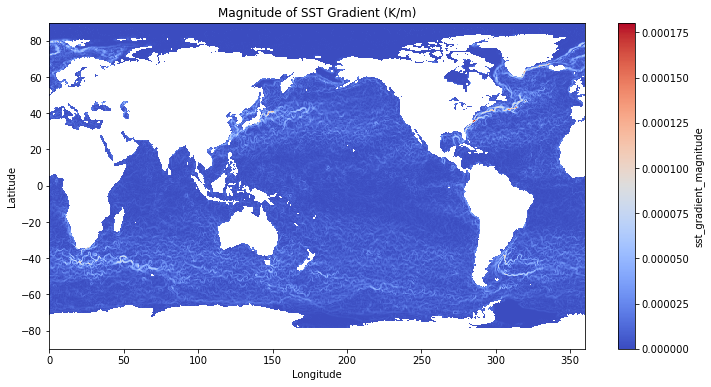

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your NetCDF file
file_path = "2010/oisst-avhrr-v02r01.20100330.nc"

# Load the dataset
try:
    # Open the dataset
    ds = xr.open_dataset(file_path)
    
    # Extract the SST data and dimensions
    sst = ds["sst"].isel(time=0, zlev=0).squeeze()  # Select the first time and depth slice
    lat = ds["lat"].values
    lon = ds["lon"].values

    # Earth's radius in meters
    R = 6371000  

    # Convert latitude and longitude from degrees to radians
    lat_radians = np.deg2rad(lat)
    lon_radians = np.deg2rad(lon)

    # Calculate the spacing in meters
    dlat = np.gradient(lat_radians)  # Gradient of latitude in radians
    dlon = np.gradient(lon_radians)  # Gradient of longitude in radians

    dy = dlat * R  # Latitudinal spacing in meters
    dx = (dlon * R * np.cos(lat_radians[:, None]))  # Longitudinal spacing in meters

    # Compute the gradients of SST
    grad_sst_y, grad_sst_x = np.gradient(sst, axis=(-2, -1), edge_order=2)

    # Adjust for grid spacing
    grad_sst_y = grad_sst_y / dy[:, None]  # Scale by latitudinal spacing
    grad_sst_x = grad_sst_x / dx  # Scale by longitudinal spacing

    # Compute the magnitude of the gradient
    grad_sst_magnitude = np.sqrt(grad_sst_x**2 + grad_sst_y**2)

    # Convert the result back to an xarray object
    grad_sst_magnitude_xr = xr.DataArray(
        grad_sst_magnitude,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        name="sst_gradient_magnitude"
    )
    
    # Plot the magnitude of the gradient
    grad_sst_magnitude_xr.plot(figsize=(12, 6), cmap="coolwarm")
    plt.title("Magnitude of SST Gradient (K/m)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


In [9]:
import xarray as xr
import numpy as np
import os
from tqdm import tqdm

# Function to calculate the SST gradient magnitude for a single day's data
def compute_sst_gradient(ds):
    # Extract the SST data and dimensions
    sst = ds["sst"].isel(time=0, zlev=0).squeeze()  # Select the first time and depth slice
    lat = ds["lat"].values
    lon = ds["lon"].values

    # Earth's radius in meters
    R = 6371000  

    # Convert latitude and longitude from degrees to radians
    lat_radians = np.deg2rad(lat)
    lon_radians = np.deg2rad(lon)

    # Calculate the spacing in meters
    dlat = np.gradient(lat_radians)  # Gradient of latitude in radians
    dlon = np.gradient(lon_radians)  # Gradient of longitude in radians

    dy = dlat * R  # Latitudinal spacing in meters
    dx = (dlon * R * np.cos(lat_radians[:, None]))  # Longitudinal spacing in meters

    # Compute the gradients of SST
    grad_sst_y, grad_sst_x = np.gradient(sst, axis=(-2, -1), edge_order=2)

    # Adjust for grid spacing
    grad_sst_y = grad_sst_y / dy[:, None]  # Scale by latitudinal spacing
    grad_sst_x = grad_sst_x / dx  # Scale by longitudinal spacing

    # Compute the magnitude of the gradient
    grad_sst_magnitude = np.sqrt(grad_sst_x**2 + grad_sst_y**2)

    # Return the gradient magnitude as an xarray DataArray
    return xr.DataArray(
        grad_sst_magnitude,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        name="sst_gradient_magnitude"
    )

# Directory paths
input_dir = "./OISST_data"  # Root directory for daily OISST data
output_dir = "./OISST_gradients"  # Directory to save yearly NetCDF files
os.makedirs(output_dir, exist_ok=True)

# Loop through each year in the directory
for year in tqdm(sorted(os.listdir(input_dir))):
    year_path = os.path.join(input_dir, year)
    if not os.path.isdir(year_path):
        continue  # Skip non-directory files

    yearly_gradients = []  # List to store daily gradient magnitudes
    dates = []  # List to track dates for each daily file

    for daily_file in sorted(os.listdir(year_path)):
        daily_path = os.path.join(year_path, daily_file)
        try:
            # Open the NetCDF file
            ds = xr.open_dataset(daily_path)
            
            # Compute the SST gradient magnitude
            gradient_magnitude = compute_sst_gradient(ds)
            
            # Append the gradient data to the list
            yearly_gradients.append(gradient_magnitude)
            dates.append(ds["time"].values[0])  # Assuming one time step per file
            
            ds.close()
        except Exception as e:
            print(f"Error processing {daily_path}: {e}")
            continue

    # Combine all daily gradients into a single xarray Dataset
    if yearly_gradients:
        combined = xr.concat(yearly_gradients, dim="time")
        combined["time"] = dates  # Set the time dimension

        # Save to NetCDF file
        output_file = os.path.join(output_dir, f"oisst_gradient_{year}.nc")
        combined.to_netcdf(output_file)
        print(f"Yearly SST gradient magnitudes saved to {output_file}")


 12%|█████████████████████▉                                                                                                                                                         | 2/16 [00:12<01:30,  6.49s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2010.nc


 19%|████████████████████████████████▊                                                                                                                                              | 3/16 [00:43<03:33, 16.44s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2011.nc


 25%|███████████████████████████████████████████▊                                                                                                                                   | 4/16 [01:19<04:47, 23.92s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2012.nc


 31%|██████████████████████████████████████████████████████▋                                                                                                                        | 5/16 [01:54<05:04, 27.68s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2013.nc


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                             | 6/16 [02:30<05:02, 30.30s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2014.nc


 44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 7/16 [03:06<04:50, 32.33s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2015.nc


 50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 8/16 [03:42<04:26, 33.31s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2016.nc


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 9/16 [04:18<03:59, 34.15s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2017.nc


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 10/16 [04:52<03:25, 34.30s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2018.nc


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 11/16 [05:24<02:47, 33.54s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2019.nc


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 12/16 [05:54<02:09, 32.37s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2020.nc


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 13/16 [06:15<01:27, 29.10s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2021.nc


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 14/16 [06:38<00:54, 27.06s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2022.nc


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 15/16 [07:02<00:26, 26.18s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2023.nc


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [07:14<00:00, 27.19s/it]

Yearly SST gradient magnitudes saved to ./OISST_gradients/oisst_gradient_2024.nc


## Now, load the dataframe on which the GAM is trained and add a row with SST

In [17]:
# Define the path to the unbinned dataset with MLD and N2
file_path = "dataframe_full_mld_and_n2.csv"
df = pd.read_csv(file_path)
print(df)

             TIME  LATITUDE  LONGITUDE  CYCLE_NUMBER      WMO  Anomaly  \
0      2021-05-06    49.236    -14.742             1  1902303        0   
1      2021-05-07    48.914    -14.606             3  1902303        0   
2      2021-05-08    48.794    -14.689             4  1902303        0   
3      2021-05-09    48.719    -14.795             5  1902303        0   
4      2021-05-10    48.638    -14.899             6  1902303        0   
...           ...       ...        ...           ...      ...      ...   
94720  2021-10-07   -50.481   -123.801            27  5906316        1   
94721  2021-11-16   -49.761   -122.267            31  5906316        1   
94722  2021-09-07   -51.633   -123.231            24  5906316        1   
94723  2021-08-18   -53.085   -122.967            22  5906316        1   
94724  2018-03-12    63.258     -5.335           205  6902544        1   

       cleaned_mld binned_mld  MLD_rate_of_change  MLD_sign_rate_of_change  \
0        27.145000      20-30    

### Load SST gradient dataset

In [18]:
grad_sst_2010 = xr.open_dataset("OISST_gradients/oisst_gradient_2010.nc")
grad_sst_2010

<xarray.Dataset>
Dimensions:                 (lat: 720, lon: 1440, time: 277)
Coordinates:
  * lat                     (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                     (lon) float32 0.125 0.375 0.625 ... 359.6 359.9
  * time                    (time) datetime64[ns] 2010-03-30T12:00:00 ... 201...
Data variables:
    sst_gradient_magnitude  (time, lat, lon) float64 ...

### How to add the value of the daily SST gradient in the 0.25 bin for day X in the df ? 

In [19]:
import pandas as pd
import xarray as xr
import numpy as np

# Open the xarray dataset
grad_sst_2010 = xr.open_dataset("OISST_gradients/oisst_gradient_2010.nc")

# Ensure longitude in xarray is 0-360 if necessary
if grad_sst_2010.lon.min() < 0:
    grad_sst_2010 = grad_sst_2010.assign_coords(lon=(grad_sst_2010.lon % 360))

# Ensure TIME column is datetime
df["TIME"] = pd.to_datetime(df["TIME"])

df

,TIME,LATITUDE,LONGITUDE,CYCLE_NUMBER,WMO,Anomaly,cleaned_mld,binned_mld,MLD_rate_of_change,MLD_sign_rate_of_change,Max_N2,cleaned_N2,Hemisphere,Year,Month,DayOfYear,AdjustedDayOfYear,log_cleaned_mld,log_cleaned_N2
0,2021-05-06,49.236,-14.742,1,1902303,0,27.145000,20-30,NaN,NaN,0.000147,0.000147,Northern,2021.0,5.0,126.0,126.0,3.337370,0.000147
1,2021-05-07,48.914,-14.606,3,1902303,0,30.330000,30-40,16.851249,1.0,0.000190,0.000190,Northern,2021.0,5.0,127.0,127.0,3.444576,0.000190
2,2021-05-08,48.794,-14.689,4,1902303,0,62.439999,60-70,19.974999,1.0,0.000219,0.000219,Northern,2021.0,5.0,128.0,128.0,4.150095,0.000219
3,2021-05-09,48.719,-14.795,5,1902303,0,70.279999,70-80,7.914999,1.0,0.000404,0.000404,Northern,2021.0,5.0,129.0,129.0,4.266616,0.000404
4,2021-05-10,48.638,-14.899,6,1902303,0,78.269997,70-80,11.869999,1.0,0.000225,0.000225,Northern,2021.0,5.0,130.0,130.0,4.372860,0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94720,2021-10-07,-50.481,-123.801,27,5906316,1,238.179993,200-300,-3.106000,-1.0,0.000041,0.000041,Southern,2021.0,10.0,280.0,97.5,5.477216,0.000041
94721,2021-11-16,-49.761,-122.267,31,5906316,1,210.369995,200-300,-11.817500,-1.0,0.000038,0.000038,Southern,2021.0,11.0,320.0,137.5,5.353610,0.000038
94722,2021-09-07,-51.633,-123.231,24,5906316,1,578.510010,500+,1.301999,1.0,0.000029,0.000029,Southern,2021.0,9.0,250.0,67.5,6.362183,0.000029
94723,2021-08-18,-53.085,-122.967,22,5906316,1,492.250000,400-500,-5.800000,-1.0,0.000034,0.000034,Southern,2021.0,8.0,230.0,47.5,6.201016,0.000034


In [20]:
print(df["TIME"].isna().sum())
df = df.dropna(subset=["TIME"])


1


In [4]:
import xarray as xr
import pandas as pd
import numpy as np


In [2]:
import xarray as xr

# Initialize the dictionary to store SST gradient data for each year
sst_gradient_data = {}

# Loop through the years to load datasets
for year in range(2010, 2025):  # Adjust the range as needed
    file_path = f"OISST_gradients/oisst_gradient_{year}.nc"  # Adjust the path if necessary
    sst_gradient_data[year] = xr.open_dataset(file_path).compute()  # Load the data into memory


In [6]:

# Function to interpolate SST gradient for each subduction event
def interpolate_gradient(row):
    try:
        # Extract the year from the event's TIME column
        event_year = pd.to_datetime(row["TIME"]).year

        # Check if SST gradient data for this year is available
        if event_year not in sst_gradient_data:
            raise ValueError(f"No SST gradient data available for year {event_year}.")

        # Select the correct dataset for the year
        grad_sst = sst_gradient_data[event_year]

        # Interpolate the SST gradient
        value = grad_sst.sst_gradient_magnitude.sel(
            lat=row["LATITUDE"],
            lon=row["LONGITUDE"],
            time=np.datetime64(row["TIME"]),
            method="nearest"
        ).values  # Use .values to get the interpolated value
        if isinstance(value, np.ndarray):
            value = value.item()  # Extract scalar value from array if necessary
    except (KeyError, ValueError, AttributeError) as e:
        print(f"Error for row {row.name}: {e}")
        value = np.nan  # Assign NaN if interpolation fails
    return value

# Read the DataFrame of subduction events
df = pd.read_csv("dataframe_full_mld_and_n2.csv")  # Adjust path to your file
df["TIME"] = pd.to_datetime(df["TIME"])  # Ensure TIME column is in datetime format

# Apply the interpolation function to each row
df["sst_gradient"] = df.apply(interpolate_gradient, axis=1)

# Save the updated DataFrame
df.to_csv("subduction_events_with_sst_gradient.csv", index=False)

# Print a preview of the updated DataFrame
print(df.head())


Error for row 88915: No SST gradient data available for year nan.
        TIME  LATITUDE  LONGITUDE  CYCLE_NUMBER      WMO  Anomaly  \
0 2021-05-06    49.236    -14.742             1  1902303        0   
1 2021-05-07    48.914    -14.606             3  1902303        0   
2 2021-05-08    48.794    -14.689             4  1902303        0   
3 2021-05-09    48.719    -14.795             5  1902303        0   
4 2021-05-10    48.638    -14.899             6  1902303        0   

   cleaned_mld binned_mld  MLD_rate_of_change  MLD_sign_rate_of_change  \
0    27.145000      20-30                 NaN                      NaN   
1    30.330000      30-40           16.851249                      1.0   
2    62.439999      60-70           19.974999                      1.0   
3    70.279999      70-80            7.914999                      1.0   
4    78.269997      70-80           11.869999                      1.0   

     Max_N2  cleaned_N2 Hemisphere    Year  Month  DayOfYear  \
0  0.00014

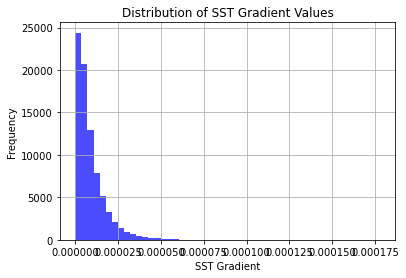

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of SST gradient values
plt.hist(df["sst_gradient"].dropna(), bins=50, color="blue", alpha=0.7)
plt.title("Distribution of SST Gradient Values")
plt.xlabel("SST Gradient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [8]:
# Summary statistics of the interpolated column
print(df["sst_gradient"].describe())


count    81030.000000
mean         0.000009
std          0.000009
min          0.000000
25%          0.000003
50%          0.000006
75%          0.000012
max          0.000178
Name: sst_gradient, dtype: float64


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

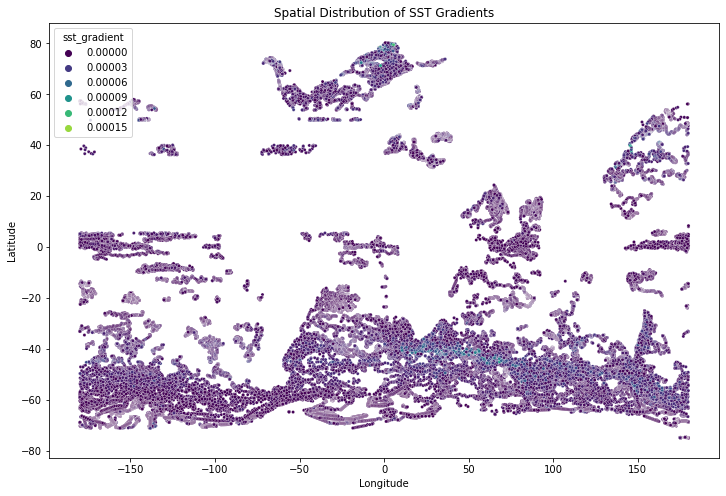

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of LATITUDE vs LONGITUDE colored by SST gradient
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["sst_gradient"], palette="viridis", s=10
)
plt.title("Spatial Distribution of SST Gradients")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="SST Gradient")
plt.show()
